# Imports and Boilerplate

In [353]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [355]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import normalize_features, get_eps, get_class_labels, calculate_median_jump, normalize_jump
from jump_detection.rolling_Ftest import *

# Initialization


In [367]:
# Define a window size for the moving Fstat
window_size = 200
gap_size = 50


# Step 1: Identify all jumps

In [368]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:200000,1:]

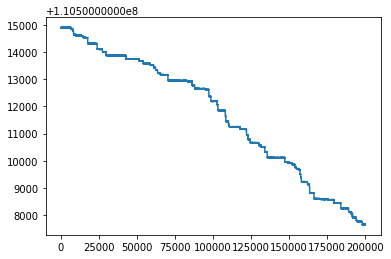

In [369]:
plt.plot(processor.data[:,1])
plt.show()

In [370]:
segments = processor.process_data()


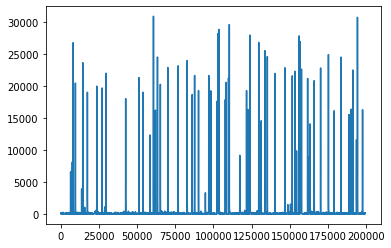

In [371]:
plt.plot(processor.moving_fstats)
# plt.yscale('log')
# plt.ylim((0,10))

In [372]:
print(r"A total of %s jumps were found: "%len(processor.segments))


A total of 227 jumps were found: 


# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [373]:
segment = processor.segments[10]

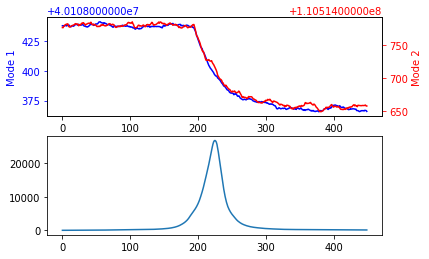

In [374]:
fig, (ax1, ax3) = plt.subplots(2,1)

column1 = segment.original[:, 0]
column2 = segment.original[:, 1]

# Plot the first column on the left y-axis
ax1.plot(column1, 'b-', label='Column 1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Mode 1', color='b')
ax1.tick_params('y', colors='b')

# Create a twin axes object and plot the second column on the right y-axis
ax2 = ax1.twinx()
ax2.plot(column2, 'r-', label='Column 2')
ax2.set_ylabel('Mode 2', color='r')
ax2.tick_params('y', colors='r')


ax3.plot(segment.Fstats)
plt.show()

In [375]:
segment.features

(28,
 2340.5551370517614,
 29291290.665131252,
 3.0687309046883002,
 8.892548185514734)

In [376]:
example_measurement = segment.calculate_freq_shift(window_size)

## Getting all features

In [384]:
jump_features = processor.get_all_features()
print(jump_features.shape)

(227, 5)


## Plotting Feature Space and Eps Determination

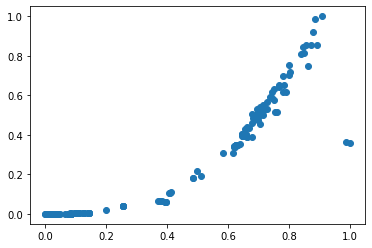

In [385]:
plt.scatter(jump_features[:,1],jump_features[:,2])

In [402]:
eps = get_eps(jump_features)
labels = get_class_labels(jump_features, 2*eps)

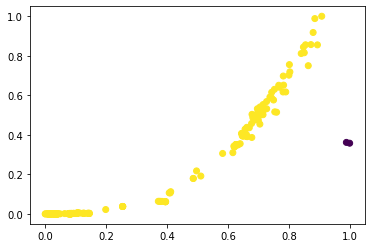

In [403]:
plt.scatter(jump_features[:,1],jump_features[:,2], c = labels)

# Step 3

In [404]:
diffs = processor.get_all_diffs()

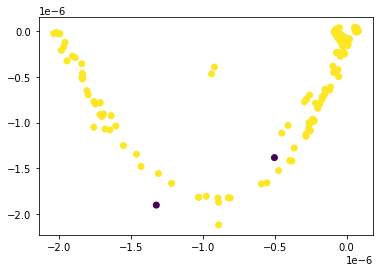

In [405]:
plt.scatter(diffs[:,0],diffs[:,1], c = labels)

In [412]:
median_jump = calculate_median_jump(processor.segments, labels)

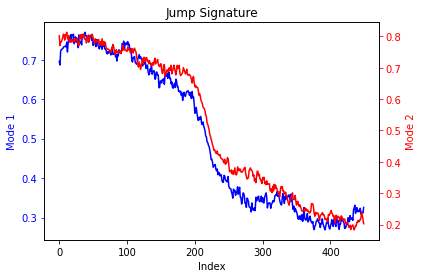

In [413]:
fig, ax1 = plt.subplots(1,1)

column1 = median_jump[:, 0]
column2 = median_jump[:, 1]

ax1.set_title("Jump Signature")
# Plot the first column on the left y-axis
ax1.plot(column1, 'b-', label='Column 1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Mode 1', color='b')
ax1.tick_params('y', colors='b')

# Create a twin axes object and plot the second column on the right y-axis
ax2 = ax1.twinx()
ax2.plot(column2, 'r-', label='Column 2')
ax2.set_ylabel('Mode 2', color='r')
ax2.tick_params('y', colors='r')

plt.show()